In [1]:
import pandas as pd
import numpy as np
import time
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, LSTM, TimeDistributed, RepeatVector
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import svm

Using TensorFlow backend.


In [7]:
#瀏覽網頁初始資料
df = pd.read_csv("../ted/cutCustBehaviorUrl_lv5_TRAN.csv", header=0)
df.columns = ["PAGE","COUNT"]
df.head()

PAGE  COUNT
0  event/wealth/epaper/20180416     32
1  event/wealth/epaper/20161031      1
2  event/wealth/epaper/20180423     68
3  event/wealth/epaper/20180102    114
4  event/wealth/epaper/20180409     30

In [14]:
#排序
df = df.sort_values(["COUNT"], ascending=False)
# df.to_csv('cutCustBehaviorUrl_sort.csv', index= False)
df.head(n=50)

PAGE   COUNT
392                   bank/personal/deposit/rate/forex  898413
447                                    bank/personal//  286797
413           bank/personal/credit-card/discount/shops   91685
435            bank/personal/credit-card/reward/result   70630
429                         bank/personal/credit-card/   62137
159                                 event/b2c/foreign/   55720
434        bank/personal/credit-card/discount/shopinfo   52856
415          bank/personal/credit-card/reward/products   47921
307                                   s/personalloan//   40164
235                                     event/loan/dg/   36797
509               bank/about/announcement/announcement   34195
374  bank/personal/deposit/foreign-service/deopsit-...   30401
378                             bank/personal/deposit/   26914
326                              s/personalloanapply//   18190
132            event/credit/1060222ecardloan/index.htm   17658
289                          event/pib/entry/index.htm   17290
303                          s/houseloan/registration/   13589
520                        bank/about/locations/branch   13288
305                       s/personalloan/default.aspx/   13286
367                      bank/personal/event/promotion   12438
443          bank/personal/credit-card/intro/bank-card   12310
525                       bank/about/services/customer   12133
224                              event/loan/house/loan   10627
353                   bank/personal/wealth/fund/search   10359
32                              event/wealth/esunfood/   10180
386                   bank/personal/deposit/gold/price    8844
555                  bank/digital/online-service/apply    8141
134                               event/credit/cartax/    7983
287                                       event/sb/dg/    7640
401         bank/personal/credit-card/intro/world-card    7135
145                      event/memberteam/grandlaunch/    6694
384                     bank/personal/deposit/rate/twd    6591
161                                      event/b2c/eb/    6574
254                    event/forex/marketing/promotion    6542
444      bank/personal/credit-card/worldcard/world_all    6328
252                       event/forex/marketing/travel    6098
341                                  bank/error.aspx//    6061
449                        bank/personal/loan/personal    5956
98           event/credit/1060321pay_apple_s/index.htm    5703
377                 bank/personal/deposit/rate/foreign    5659
523          bank/about/locations/foreign-currency-atm    5467
320                                         s/sbloan//    5075
459                      bank/personal/loan/tools/info    5060
262                       event/forex/situation/fxfund    4809
217                            event/member/ticket/pib    4566
249                    event/forex/marketing/flashsale    4336
487                   bank/about/faq/digital/telephone    4288
433    bank/personal/credit-card/intro/co-branded-card    4021
251                        event/forex/marketing/fxatm    3917
205                event/taobaocarnival/2018/sueensday    3728

In [13]:
# low = .05
# high = .95
# df_quan = df.quantile([low, high])
# df_quan.head()
df.describe()

COUNT
count     559.000000
mean     3953.230769
std     40501.808732
min         1.000000
25%         9.000000
50%        70.000000
75%       518.000000
max    898413.000000

In [40]:
df = df.iloc[10:500]
df.head()

PAGE  COUNT
444  bank/personal/credit-card/intro/bank-card  12310
526               bank/about/services/customer  12133
225                      event/loan/house/loan  10627
354           bank/personal/wealth/fund/search  10359
33                      event/wealth/esunfood/  10180

In [55]:
df = df.sort_values(["COUNT"], ascending=True)
df = df.iloc[100:]
df.head()

PAGE  COUNT
426  bank/personal/credit-card/travelercard/offer     13
57       event/b2b/foreign_1126/bsrkyki_form.html     13
230                          event/loan/dg170215/     14
473                         bank/scf-contact-me//     14
544                   bank/newmobile/group3/old13     15

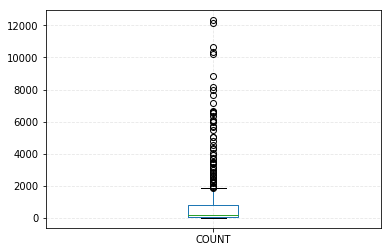

In [56]:
df.boxplot(column='COUNT')
plt.grid(linestyle='--',alpha=0.3)
plt.show()

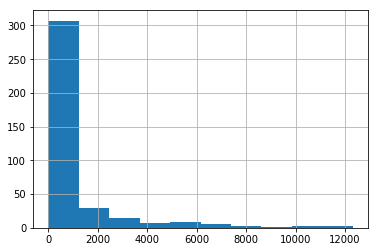

In [59]:
df['COUNT'].hist(bins=10)
plt.show()